# Classifying ALL with XGBoost

## Dependencies

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.utils.fixes import loguniform

from scipy.stats import uniform, truncnorm, randint, loguniform

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score, recall_score

# Function for creating model pipelines - imblearn
## from imblearn.pipeline import make_pipeline as imbl_pipe

# Over-sampling using SMOTE
## from imblearn.over_sampling import SMOTE

# Import XGBoost
from xgboost import XGBClassifier

# Import Optuna
import optuna

random_state = 10

In [2]:
# Import the script from different folder
import sys  
sys.path.append('../scripts')

import metrics_utilities as mu

## Batch_1 Train Dataset

In [3]:
df_train = pd.read_pickle('../data/batch_1/train_data.pickle')
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.579951,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.166770,0.0,0.0,...,0.747650,0.245581,0.030024,0.174167,0.540283,0.0,0.0,0.353232,0.0,1
1,0.578539,0.0,0.059236,0.000000,0.000000,0.0,0.0,0.199044,0.0,0.0,...,0.668872,0.162014,0.000000,0.127915,0.493748,0.0,0.0,0.275539,0.0,1
2,0.087414,0.0,0.695490,0.436274,0.000000,0.0,0.0,0.103897,0.0,0.0,...,0.492471,0.082775,0.000000,0.112004,0.438546,0.0,0.0,0.096754,0.0,0
3,0.329184,0.0,0.000000,0.029938,0.024057,0.0,0.0,0.036206,0.0,0.0,...,0.654933,0.337055,0.000000,0.000000,0.346229,0.0,0.0,0.317232,0.0,0
4,0.053473,0.0,0.000000,0.184720,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.732901,0.191005,0.000000,0.049176,0.545555,0.0,0.0,0.281541,0.0,0


#### Separate features and labels

In [4]:
X_train = df_train.iloc[:, : -1]
y_train = df_train['label']
print(X_train.shape, y_train.shape)

(8528, 4608) (8528,)


## Batch_1 Test Dataset

In [5]:
df_test = pd.read_pickle('../data/batch_1/test_data.pickle')
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.353652,0.0,0.000000,0.305203,0.0377,0.0,0.0,0.000000,0.0,0.0,...,0.728745,0.127965,0.0,0.000000,0.303071,0.0,0.0,0.028939,0.0,0
1,0.695522,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.104255,0.0,0.0,...,0.730706,0.220946,0.0,0.016399,0.487663,0.0,0.0,0.354154,0.0,1
2,0.279904,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.160006,0.0,0.0,...,0.676915,0.199919,0.0,0.062777,0.000000,0.0,0.0,0.000000,0.0,0
3,0.098326,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.172469,0.0,0.0,...,0.945252,0.119779,0.0,0.021867,0.614726,0.0,0.0,0.154880,0.0,0
4,0.270445,0.0,0.769334,0.022462,0.0000,0.0,0.0,0.000000,0.0,0.0,...,0.538275,0.242577,0.0,0.014566,0.438992,0.0,0.0,0.191071,0.0,0


#### Separate features and labels

In [6]:
X_test = df_test.iloc[:, :-1]
y_test = df_test['label']
print(X_test.shape, y_test.shape)

(2133, 4608) (2133,)


## Create Model

In [7]:
clf_xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0, random_state=random_state)

In [8]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [9]:
clf_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': 0,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 10,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'gpu_hist',
 'validate_parameters': None,
 'verbosity': None}

In [10]:
y_pred = clf_xgb.predict(X_test)

In [11]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [12]:
accuracy_score(y_test, y_pred)

0.8321612751992499

In [27]:
# Compare training and testing scores
print(f"Training Data Score: {clf_xgb.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_xgb.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8321612751992499


#### Names of Classes

In [13]:
target_names = ['all', 'hem']

In [14]:
confusion_matrix(y_test, y_pred)

array([[1352,  103],
       [ 255,  423]])

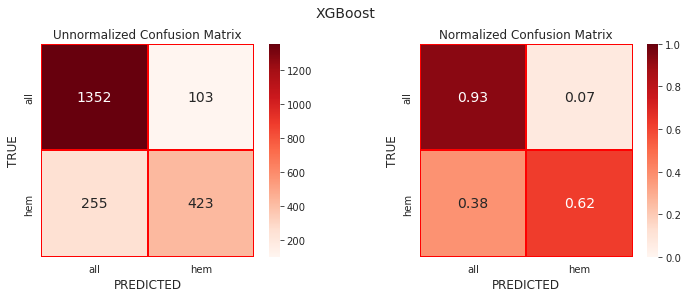

In [15]:
# Plot confusion matrices
mu.plot_cm_unnorm_and_norm('XGBoost', y_test, y_pred, target_names, 'Reds')

In [16]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         all       0.84      0.93      0.88      1455
         hem       0.80      0.62      0.70       678

    accuracy                           0.83      2133
   macro avg       0.82      0.78      0.79      2133
weighted avg       0.83      0.83      0.83      2133



## Hyperparameter tuning for XGBoost

In [66]:
# clf_xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0, objective='binary:logistic', random_state=random_state)

In [8]:
# clf_xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0, random_state=random_state)

In [17]:
# Define search space

space_xgb = {'gamma': uniform(0, 1),
              'max_depth': randint(2, 8),
              'n_estimators': randint(10, 300)
             }
# param_grid = {'xgbclassifier__gamma': [0.5, 0.8, 1],
#               'xgbclassifier__max_depth': [3, 4, 5, 6],
#               'xgbclassifier__n_estimators': [50, 100, 200]
#              }

In [18]:
# Made folds by preserving the percentage of samples for each class
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [19]:
# Create the RandomizedSearchCV model 
search = RandomizedSearchCV(clf_xgb, 
                            space_xgb, 
                            n_iter=20, 
                            cv=skf,      
                            scoring='f1', 
                            #refit='recall',
                            #error_score='raise',
                            n_jobs=1, 
                            verbose=4,
                            random_state=random_state)

In [20]:
# Execute search - fit the model
search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END gamma=0.771320643266746, max_depth=6, n_estimators=25;, score=0.619 total time=   3.0s
[CV 2/5] END gamma=0.771320643266746, max_depth=6, n_estimators=25;, score=0.592 total time=   2.9s
[CV 3/5] END gamma=0.771320643266746, max_depth=6, n_estimators=25;, score=0.621 total time=   2.9s
[CV 4/5] END gamma=0.771320643266746, max_depth=6, n_estimators=25;, score=0.579 total time=   2.8s
[CV 5/5] END gamma=0.771320643266746, max_depth=6, n_estimators=25;, score=0.628 total time=   2.8s
[CV 1/5] END gamma=0.6336482349262754, max_depth=5, n_estimators=166;, score=0.671 total time=   6.0s
[CV 2/5] END gamma=0.6336482349262754, max_depth=5, n_estimators=166;, score=0.635 total time=   6.0s
[CV 3/5] END gamma=0.6336482349262754, max_depth=5, n_estimators=166;, score=0.669 total time=   6.0s
[CV 4/5] END gamma=0.6336482349262754, max_depth=5, n_estimators=166;, score=0.627 total time=   6.0s
[CV 5/5] END gamma=0.633648234

/home/damir/miniconda3/envs/omdena/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/damir/miniconda3/envs/omdena/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/damir/miniconda3/envs/omdena/lib/python3.11/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/damir/miniconda3/envs/omdena/lib/python3.11/site-packages/xgboost/sklearn.py", line 1490, in

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=0,
                                           grow_policy=None,
                                           importance_...
                                           predictor=None, random_state=10, ...),
                   n_iter=20, n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff1e34c9690>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff1e34ca6d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff1e34cad90>},
                   random_state=10, scoring='f1', verbose=4)

In [21]:
# Summarize result
print(f'Best Score: {search.best_score_}')
print(f'Best Hyperparameters: {search.best_params_}')

Best Score: 0.6638721860833655
Best Hyperparameters: {'gamma': 0.04689631938924976, 'max_depth': 5, 'n_estimators': 294}


In [22]:
# Compare training and testing scores
print(f"Training Data Score: {search.score(X_train, y_train)}")
print(f"Testing Data Score: {search.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.7198027937551355


In [23]:
# Prediction
y_pred_ht = search.predict(X_test)
print(f"First 10 Predictions:   {y_pred_ht[:10]}")
print(f"First 10 Actual labels: {np.array(y_test)[:10]}")

First 10 Predictions:   [0 1 0 0 0 0 1 0 0 0]
First 10 Actual labels: [0 1 0 0 0 0 0 1 0 0]


In [24]:
cm = confusion_matrix(y_test, y_pred_ht)
print(cm)

[[1354  101]
 [ 240  438]]


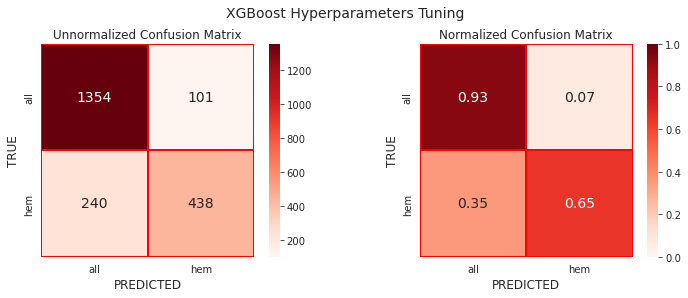

In [25]:
# Plot confusion matrix and its normalized version.
target_names = ['all', 'hem']
mu.plot_cm_unnorm_and_norm('XGBoost Hyperparameters Tuning', y_test, y_pred_ht, target_names, 'Reds')

In [26]:
print(classification_report(y_test, y_pred_ht, target_names=target_names))

              precision    recall  f1-score   support

         all       0.85      0.93      0.89      1455
         hem       0.81      0.65      0.72       678

    accuracy                           0.84      2133
   macro avg       0.83      0.79      0.80      2133
weighted avg       0.84      0.84      0.83      2133



In [31]:
pred_d = {'XGBoost (Defaults' : y_pred,
            'XGBoost Best Score' : y_pred_ht
    
}

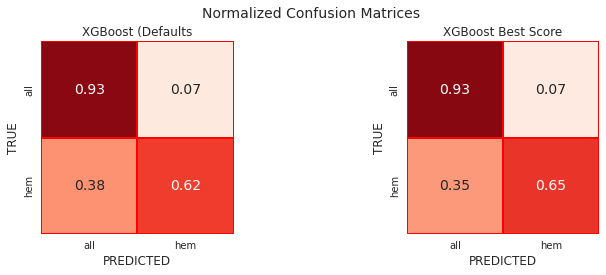

In [32]:
# Plot all confusion matrices 
mu.plot_conf_matrices(pred_d, y_test, target_names, 'Reds')